# Notebook imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
# Path for testing data files in .txt format
TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

# Path for token probabilities in .txt format
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

# Used Vocabulary Size for classificator
VOCAB_SIZE = 2500

# Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')

# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

# Calculating Joint Probability

### The Dot Product

In [4]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])

print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [5]:
# Multiplying using the dot product method from numpy
a.dot(b)

22

In [6]:
# Challenge: Calculating the product and dimensions of X_text and prob_token_spam
X_test.dot(prob_token_spam).shape

(1723,)

## Set the Prior

$$P(Spam \, | \, x) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(x)}$$

In [7]:
PROB_SPAM = 0.311161

In [8]:
# Calculatin the log probabilities of the token given that the email was spam. prob_token_spam

In [9]:
prob_token_spam

array([9.00782431e-03, 4.89588654e-03, 6.83805641e-03, ...,
       1.51732021e-05, 5.05773403e-05, 3.54041382e-05])

In [10]:
np.log(prob_token_spam)

array([ -4.70966171,  -5.31935991,  -4.98525174, ..., -11.09597971,
        -9.8920069 , -10.24868185])

## Joint probability in log format

In [11]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [12]:
joint_log_spam[:5]

array([  3.18412645,  15.12449517,  19.11311843, -16.66615013,
        27.73823909])

In [13]:
# Calculating the log probability that the emails are not spam given their tokens

$$P(Ham \, | \, x) = \frac{P(X \, | \, Ham \,) \, (1 - P(Spam))} {P(x)}$$

In [14]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)

In [15]:
joint_log_ham[:5]

array([-11.08393986, -40.13777927, -38.48893797,  -2.88590262,
       -60.64709556])

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<br>
<center> <b>OR<b> 
    </center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [16]:
# Creating vector of predictions for ^y 

prediction = joint_log_spam > joint_log_ham

In [17]:
prediction[-5:]

array([False, False, False, False, False])

In [18]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

# Simplify

$$P(X \, | \, Spam) \neq \frac{P(X \, | \, Spmam \,) \, P(Spam)} {P(X)}$$

In [19]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham))  + np.log(1 - PROB_SPAM)

# Metrics and Evaluations

### Accuracy

In [20]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1671
Docs classified incorrectly 52


In [21]:
# Accuracy
correct_docs/len(X_test)

0.9698200812536274

In [22]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fracction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fracction classified incorrectly is 3.02%
Accuracy of the model is 96.98%


# Visualising Results

In [27]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

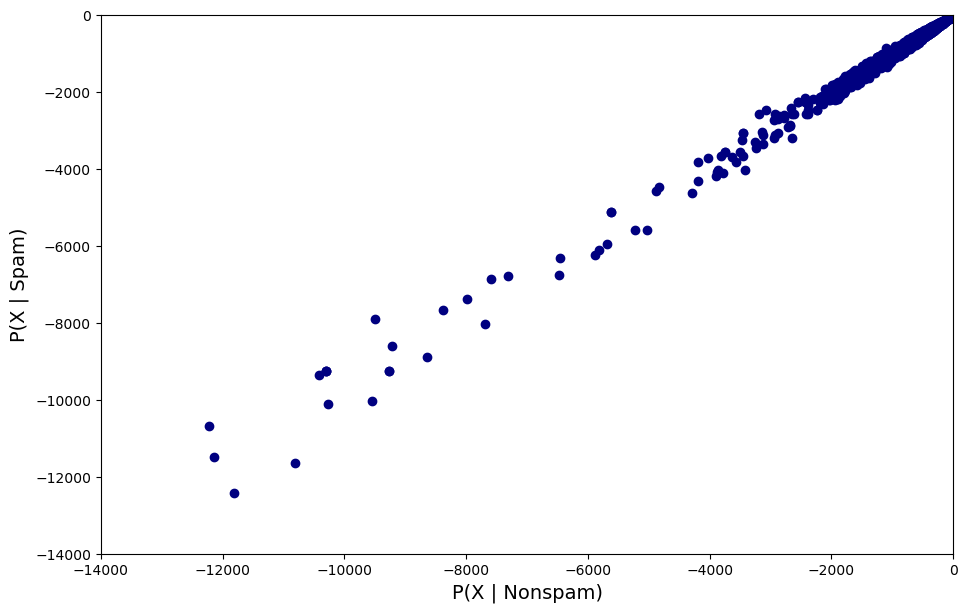

In [26]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set the scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

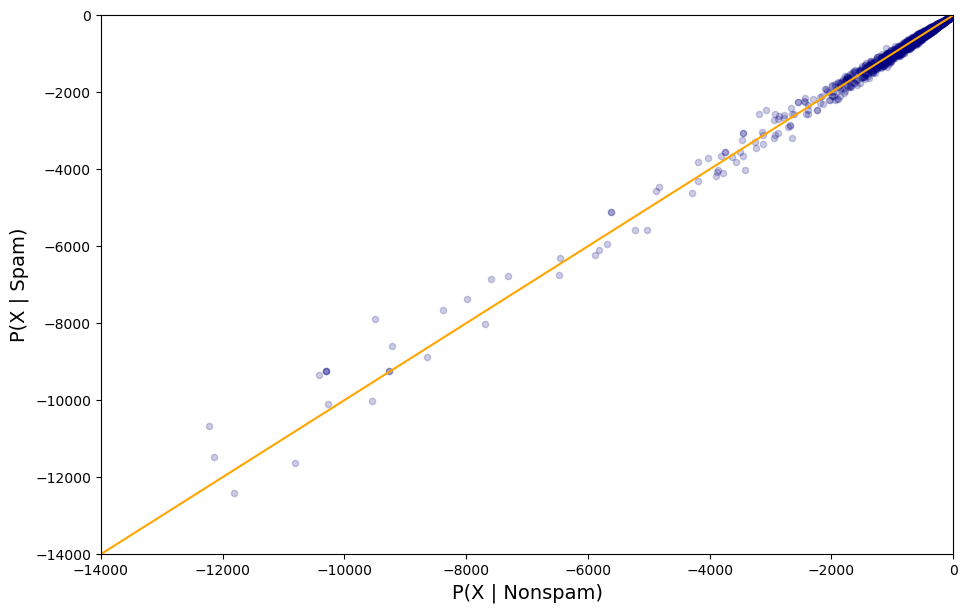

In [32]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set the scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.2, s=20)
plt.plot(linedata, linedata, color= 'orange')
plt.show()

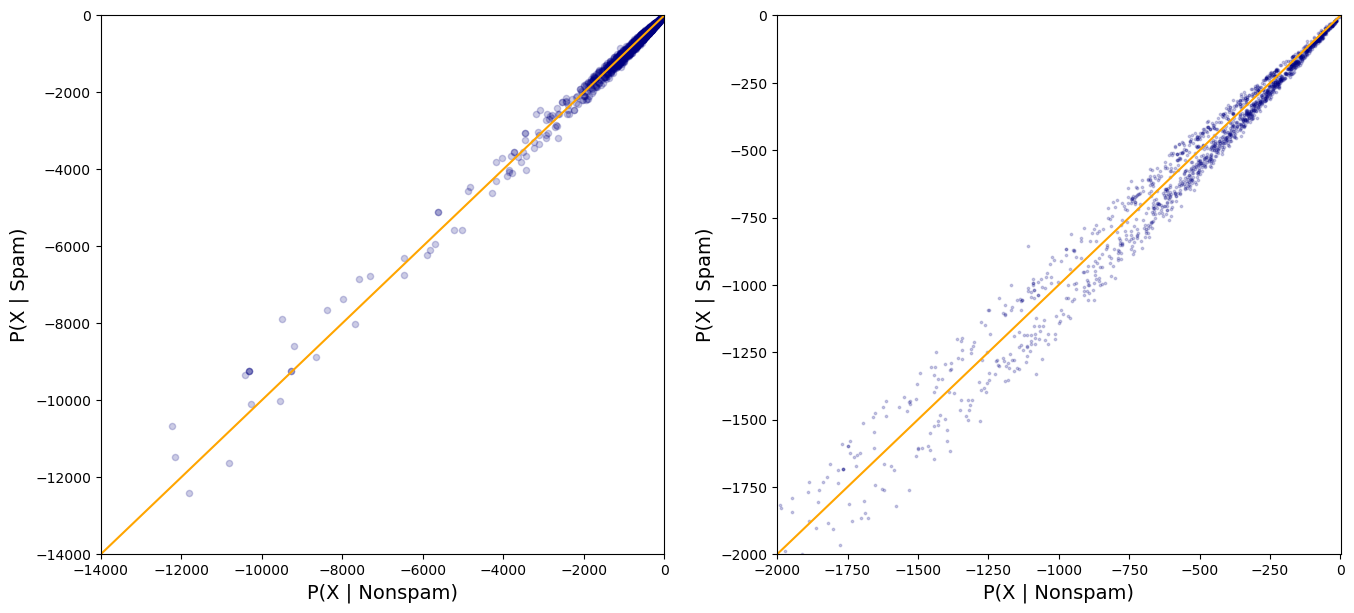

In [34]:
plt.figure(figsize=(16, 7))

# Chart 1
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set the scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.2, s=20)
plt.plot(linedata, linedata, color= 'orange')

# Chart 2
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set the scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.2, s=3)
plt.plot(linedata, linedata, color= 'orange')

plt.show()

In [39]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels:y_test})

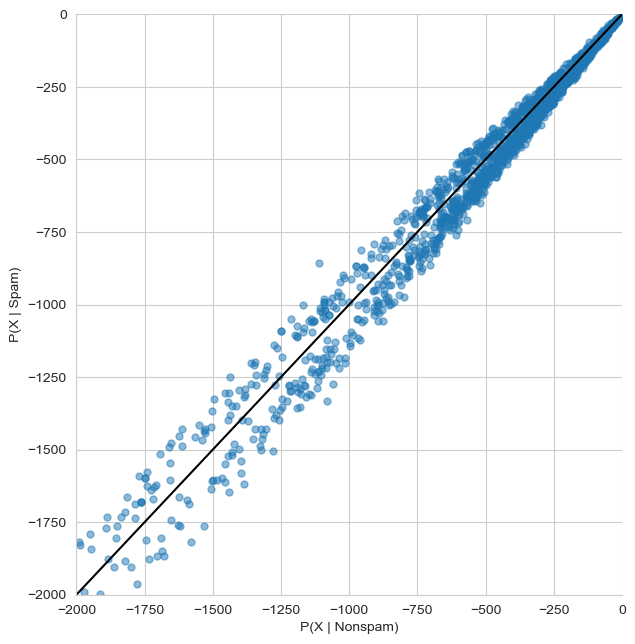

In [50]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, 
           aspect=1, fit_reg=False, scatter_kws={'alpha': 0.5, 's':25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color= 'black')

# parameter size is deprecated for sms.lmplot as wel as sns.plt.show(), 
# to control size of chart use, height and aspect

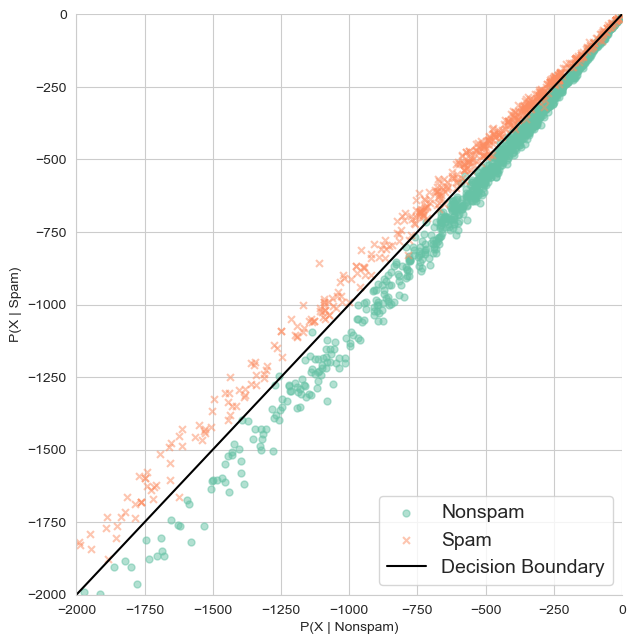

In [61]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, 
           aspect=1, fit_reg=False, scatter_kws={'alpha': 0.5, 's':25}, 
           hue=labels, markers=['o', 'x'], palette='Set2', legend=False)

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color= 'black')

plt.legend(('Nonspam', 'Spam', 'Decision Boundary'), loc='lower right', fontsize=14)

# parameter size is deprecated for sms.lmplot as wel as sns.plt.show(), 
# to control size of chart use, height and aspect

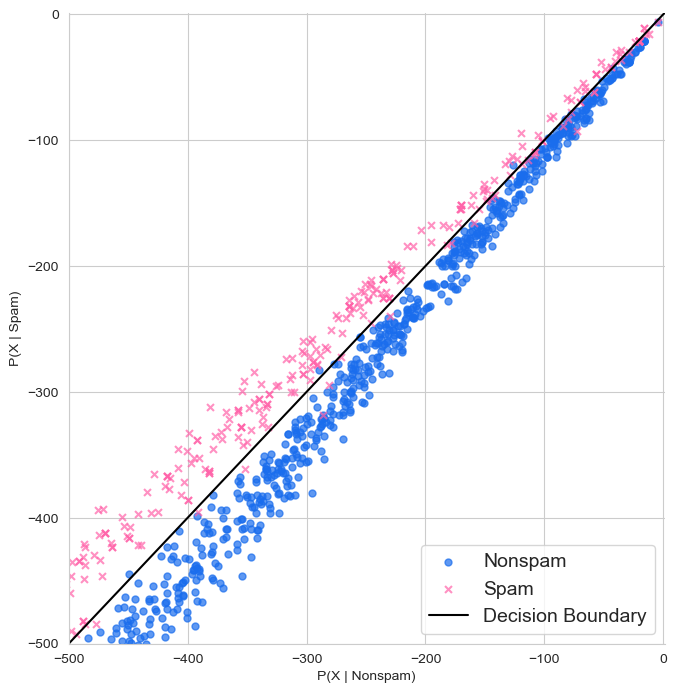

In [66]:
my_colors = ['#1A6DED', '#FF62A9']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=7, 
           aspect=1, fit_reg=False, scatter_kws={'alpha': 0.7, 's':25}, 
           hue=labels, markers=['o', 'x'], palette=my_colors, legend=False)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color= 'black')

plt.legend(('Nonspam', 'Spam', 'Decision Boundary'), loc='lower right', fontsize=14)

# parameter size is deprecated for sms.lmplot as wel as sns.plt.show(), 
# to control size of chart use, height and aspect

### False Positives and False Negatives

In [67]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1169,  554]))

In [68]:
true_pos = (y_test == 1) & (prediction == 1)

In [69]:
# Number of true possitives 
true_pos.sum()

545

In [74]:
# Creating an array of false positives and false negatives.
false_pos = (y_test == 0) & (prediction == 1)

false_pos.sum()

9

In [75]:
false_neg = (y_test == 1) & (prediction == 0)

false_neg.sum()

43

## Recall Score

In [86]:
# Calculating recal score

recall_score = true_pos.sum()/(true_pos.sum() + false_neg.sum())
print('Recall Score is: {:.2%}'.format(recall_score))

Recall Score is: 92.69%


## Precision Score

In [88]:
# Calculating precision score

precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision Score is: {:.3%}'.format(precision_score))

Precision Score is: 98.375%


## F-Score or F1 Score

In [89]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is: {:.2}'.format(f1_score))

F Score is: 0.95
